## Королев Игорь Михайлович
Группа: М8О-308Б-19

Почта: ikorolew02@gmail.com

# Лабораторная работа №0

**Цель работы:** Выбрать набор данных. Поставить задачу, которую необходимо решить с помощью эти данных. Определить что нужно получить на выходе, как это измерять, посмотреть на сами данные. Определить являются ли данные грязными или чистыми. Есть ли у данных пропуски. Как зависят между собой признаки.

**Задача:** На наборе данных о сердечной недостаточности подготовить данные для решения бинарной классификации наличия сердечной недостаточности. С помощью датасета необходимо определять, есть ли у пациента сердечная недостаточноть.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

Импортируем данные

In [2]:
data = pd.read_csv('heart.csv')

Посмотрим информацию о полученных данных.

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.shape

(918, 12)

Начальные данные представляют из себя 918 строк, каждая из которых содержит информацию о 12 признаках.

In [5]:
print('Признаки: {}'.format(data.columns.values))

Признаки: ['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope' 'HeartDisease']


* Age - возраст пациента;

* Sex - пол пациента;

* ChessPainType - тип боли в груди;

* ResingBP - артериальное давление в состоянии покоя;

* Cholesterol - холестерин;

* Fasting - уровень сахара в крови натощак;

* RestingECG - ЭКГ;

* MaxHR - максимальная достигнутая частота сердечных сокращений;

* ExerciseAngina - Физическая стенокардия;

* Oldpeak - снижение ST, вызванная физической нагрузкой;

* ST_Slope - наклон снижения сегмента;

* HeartDisease - болезнь сердца.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Из выведенной информации видно что датасет содержит в себе типы данных: **числовые** и **категориальные**.

**Числовые данных** - 7 (1 - **float64**, 6 - **int64**)

**Категориальных данных** - 5 (5 - **object**)

In [7]:
# Количество уникальных данных для каждого признака
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
# Смотрим, повторяются ли у нас значения
print(data.duplicated().value_counts())
# Смотрим есть ли в колонках пустые данные
print(data.isnull().sum())

False    918
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Мы узнали количество уникальных значений для каждого признака датасета.

Данные в датасете не повторяются (нет повторяющихся строк).

Набор данных содержит только непустые значения, поэтому нет необходимости обрабатывать отсутствующие значения.

In [9]:
# Разделим числовые и категориальные данные
numerical = data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

print('Числовые признаки: {}'.format(data[numerical].columns))
print('Категориальные признаки: {}'.format(data[categorical].columns))

Числовые признаки: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Категориальные признаки: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


Задачей является предсказывание болезни сердца у пациента. Для этого переменнной target для нас будет **HeartDisease**.

Посмотрим какое количество пациентов по наблюдению имеют болезнь сердца, и какое количество не имеют.

Процент пациентов, у которых есть болезнь сердца: 55.34 % (508 пациентов)
Процент пациентов, у которых нет болезни сердца: 44.66 % (410 пациентов)


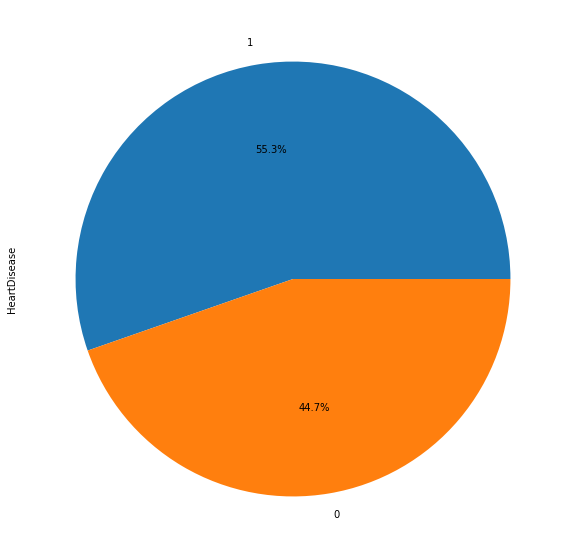

In [10]:
y = data['HeartDisease']
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))
print('Процент пациентов, у которых нет болезни сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[0]*100,2), y.value_counts()[0]))
plt.show(data['HeartDisease'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10)))

#### Числовые данные

In [11]:
data[numerical].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [12]:
# Информация о числовых данных
data[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


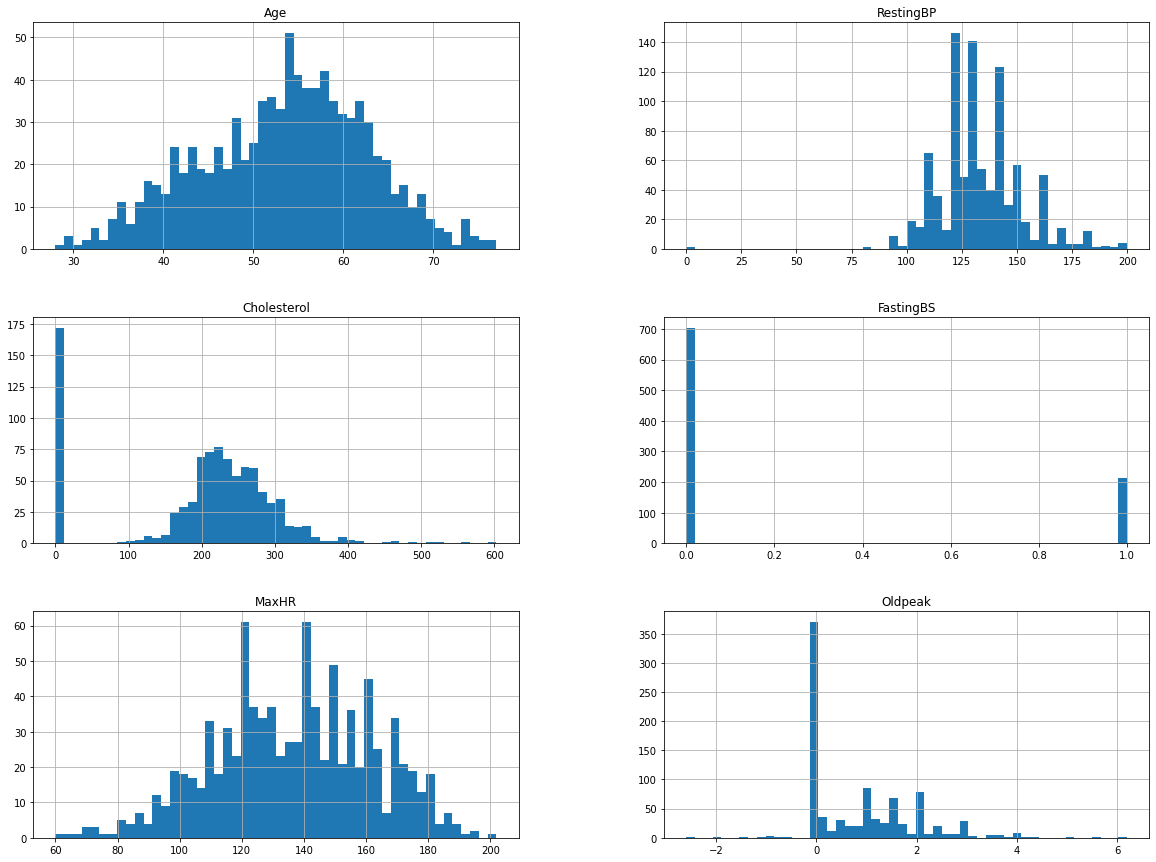

In [13]:
%matplotlib inline
data[numerical].hist(bins=50,figsize=(20,15))
plt.show()

Поищем выбросы

In [14]:
figure = px.box(data,y="Age",x="HeartDisease",title=f"Распределение Age")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [15]:
figure = px.box(data,y="RestingBP",x="HeartDisease",title=f"Распределение RestingBP",color="Sex")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [16]:
figure = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Распределение Cholesterol")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [17]:
figure = px.box(data,y="FastingBS",x="HeartDisease",title=f"Распределение FastingBS",color="Sex")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [18]:
figure = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [19]:
figure = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Распределение Oldpeak")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

Для удобства выведем всё вместе

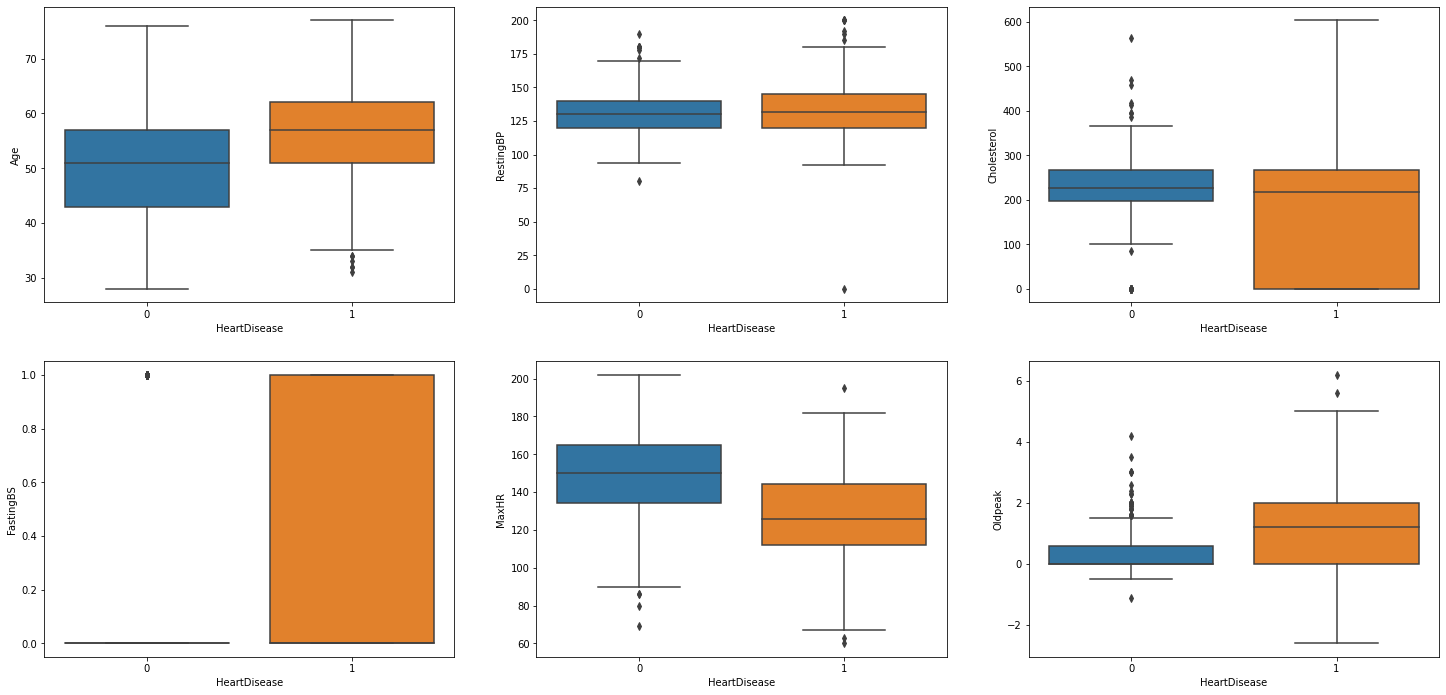

In [20]:
index = 0
plt.figure(figsize=(25,25))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=data)

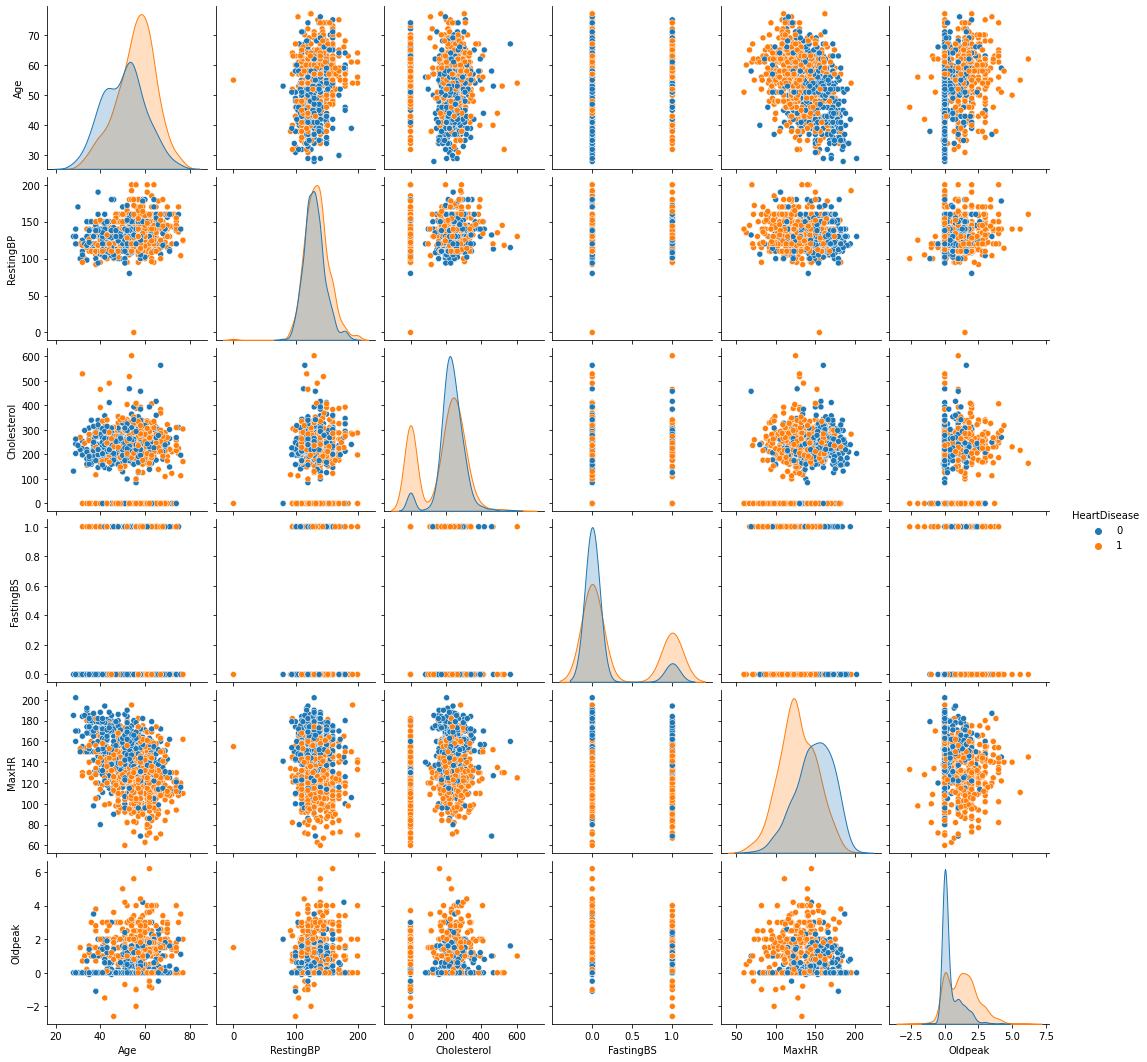

In [21]:
sns.pairplot(data, hue="HeartDisease")

Выведем матрицу корреляции числовых признаков.

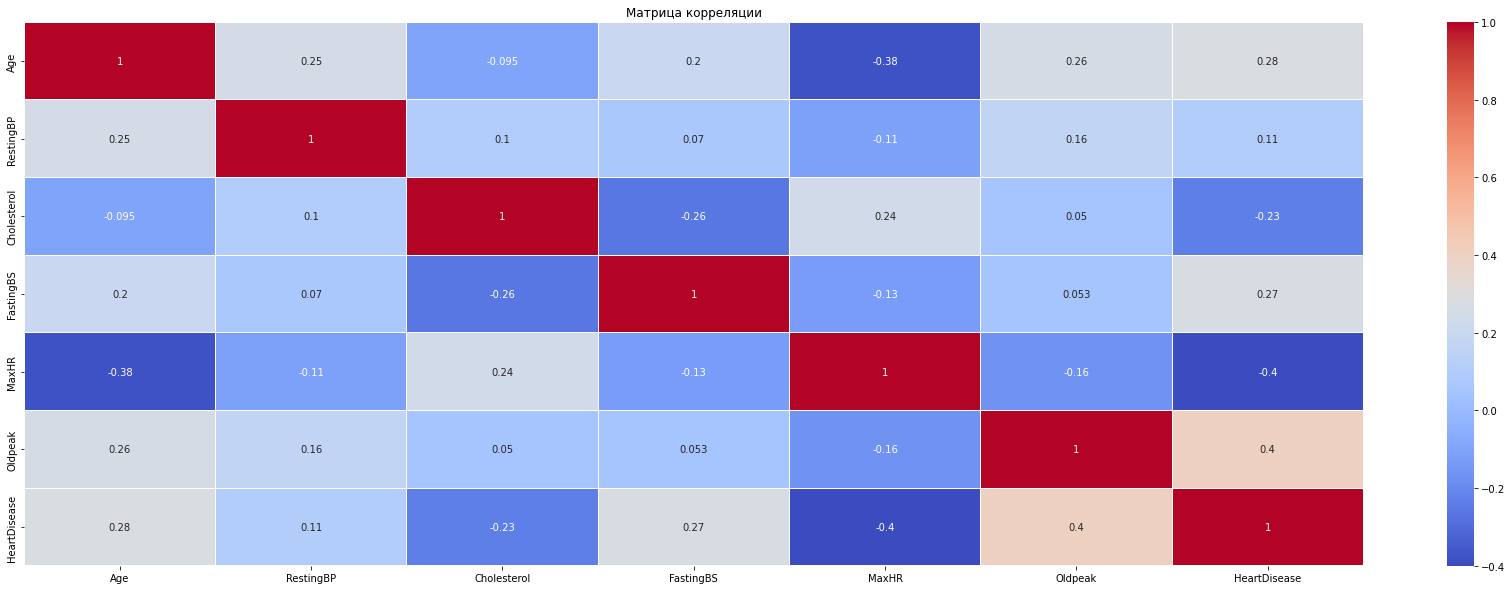

In [22]:
figure = plt.figure(figsize=(30, 10))
ax = figure.add_subplot()
ax.set_title('Матрица корреляции')

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidth=0.1)

На основе полученной корреляционной матрицы можно видеть:
* Слабая коррелляция между числовыми значениями и целевой переменной HeartDisease
* MaxHR имеет отрицательную корреляцию с HeartDisease
* Cholesterol имеет отрицательную корреляцию с HeartDisease
* Oldpeak имеет наибольшую положительную корреляцию с HeartDisease

Посмотрим ассимметрию и эксцесс.

In [23]:
skew_values = data.skew().sort_values(ascending=False)
skew_values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

Для ассиметрии нормальное распределение для числовых признаков.

#### Категориальные данные

In [24]:
data[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [25]:
# Информация о категориальных данных
data[categorical].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [26]:
print('Смещение: {}'.format(data['HeartDisease'].skew()))
print('Эксцесс (острота пика распределения СВ): {}'.format(data['HeartDisease'].kurtosis()))

Смещение: -0.21508633825088655
Эксцесс (острота пика распределения СВ): -1.9580084425329685


Посмотрим бинарные признаки

In [27]:
def charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    figure, axes = plt.subplots(1,2,figsize=(15,10))
    labels = data[feature].unique()
    textprops = {"fontsize":16}
    axes[0].pie(data[data[target]==0][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]==1][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

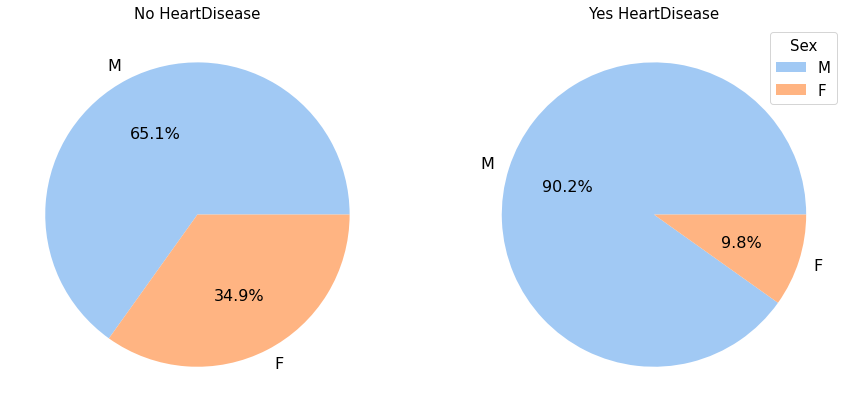

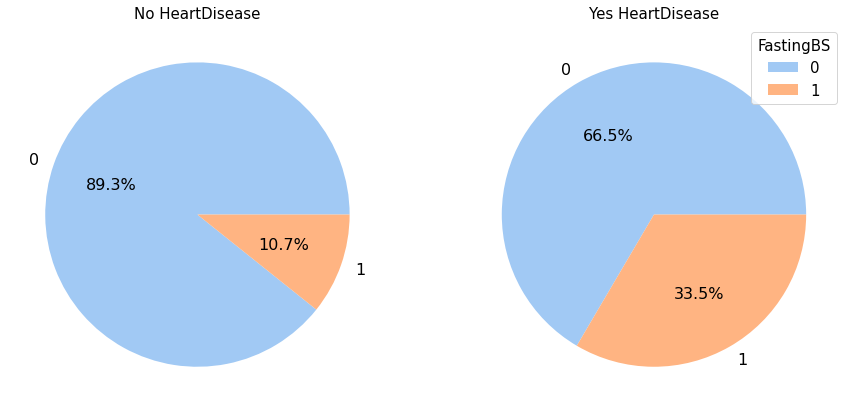

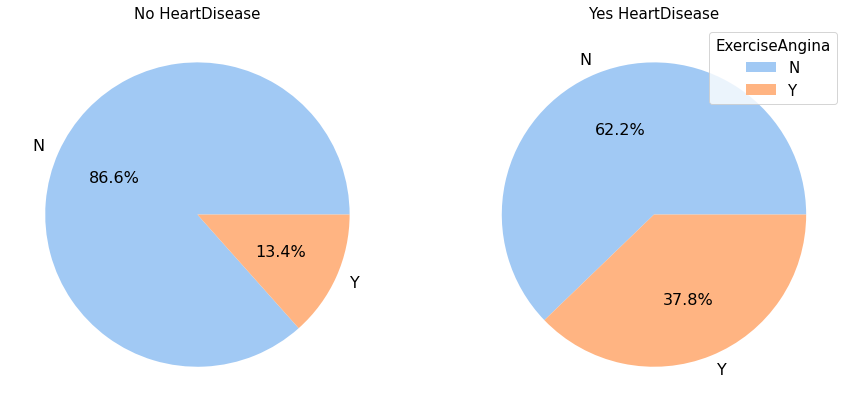

In [28]:
binary_feature = ["Sex", "FastingBS", "ExerciseAngina"]
for feature in binary_feature:
    charts(data,feature,"HeartDisease")

In [29]:
data[data['HeartDisease']==1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [30]:
data[categorical]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [31]:
figure = px.histogram(data, x="Sex", hover_data=data.columns,
title="Соотношения полов")
figure.show()

In [32]:
figure = px.histogram(data, x="HeartDisease", color="Sex", hover_data=data.columns,
title="Распространение болезни сердца среди полов", barmode="group")
figure.show()

Слева - количество мужчин и женщин, которые не имеют болезни сердца.

Справа - количество мужчин и женщин с болезнью сердца.

In [33]:
y = data['HeartDisease']
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))
print('Процент пациентов, у которых есть болезнь сердца: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[0]*100,2), y.value_counts()[0]))

Процент пациентов, у которых есть болезнь сердца: 55.34 % (508 пациентов)
Процент пациентов, у которых есть болезнь сердца: 44.66 % (410 пациентов)


In [34]:
# Вывод процентной вероятности для заданного признака и заданных рассматриваемых значений
def percentage_probability(feature, feature_values) : 
    first_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])
    second_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])
    print("\n" + feature + " : \n")
    print('Процентная вероятность для {} : {} иметь болезнь сердца: {} %'.format(feature, feature_values[0], round(first_with_heart_disease / num_first_value * 100, 2)))
    print('Процентная вероятность для {} : {} иметь болезнь сердца: {} %'.format(feature, feature_values[1], round(second_with_heart_disease / num_second_value * 100, 2)))

In [35]:
percentage_probability('Sex', ['M', 'F'])


Sex : 

Процентная вероятность для Sex : M иметь болезнь сердца: 63.17 %
Процентная вероятность для Sex : F иметь болезнь сердца: 25.91 %


* Большинство пациентов с сердечным заболеванием - мужчины
* Мужчины почти в 3 раза больше имеют сердечные заболевания по сравнению с женщинами

In [36]:
figure = px.histogram(data, x="ExerciseAngina", color="HeartDisease", hover_data=data.columns,
title="Стенокардия", barmode="group")
figure.show()

In [37]:
percentage_probability('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

Процентная вероятность для ExerciseAngina : Y иметь болезнь сердца: 85.18 %
Процентная вероятность для ExerciseAngina : N иметь болезнь сердца: 35.1 %


* Высокая вероятность болезни сердца у людей, страдающих стенокардией.
* Вероятность болезни сердца для человека, страдающего стенокардией значительно больше, чем для человека, не страдающего ей.

In [38]:
percentage_probability('FastingBS', [0, 1])


FastingBS : 

Процентная вероятность для FastingBS : 0 иметь болезнь сердца: 48.01 %
Процентная вероятность для FastingBS : 1 иметь болезнь сердца: 79.44 %


* У людей с высоким уровнем сахара в крови наблюдается высокая вероятность болезни сердца.

In [39]:
figure = px.histogram(data, x="ChestPainType", color="HeartDisease", hover_data=data.columns,
title="Типы грудной боли", barmode="group")
figure.show()

Из гистограммы можно увидеть:
* Большинство пациентов с сердечным заболеванием имеют бессимптомную боль в груди (ASY).
* Большинство пациентов с атипичной стенокардией (ATA) не имеют болезни сердца.

In [40]:
figure = px.histogram(data, x="RestingECG", color="HeartDisease", hover_data=data.columns,
title="ЭКГ покоя (Resting ECG)", barmode="group")
figure.show()

Из гистограммы можно увидеть:
* Результаты диаграмм в покое для людей с болезнью сердца и для людей без болезни отличаются не сильно.
* Для человека с ST более вероятна болезнь сердца, чем для других типов RestingECG.

In [41]:
figure = px.histogram(data, x="ST_Slope", color="HeartDisease", hover_data=data.columns,
title="ЭКГ покоя (Resting ECG)", barmode="group")
figure.show()

Из гистограммы можно увидеть:

* Для типа Flat большое количество с болезнью сердца.
* Для типа Up количество не имеющих болезнь сердца сильно превышает количество с болезнью.

In [42]:
figure = px.histogram(data, x="RestingECG", hover_data=data.columns,
title="Распределение ЭКГ покоя (Resting ECG)")
figure.show()

Никакие признаки удалять не будем.

Только преобразуем категориальные признаки в числовые с помощью OneHotEncoding

In [43]:
final_data = pd.get_dummies(data, drop_first=True)

In [44]:
final_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [45]:
final_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Полученный датасет содержит 918 строк и 16 колонок (признаков)

Выведем матрицу корреляции для преобразованного датасета

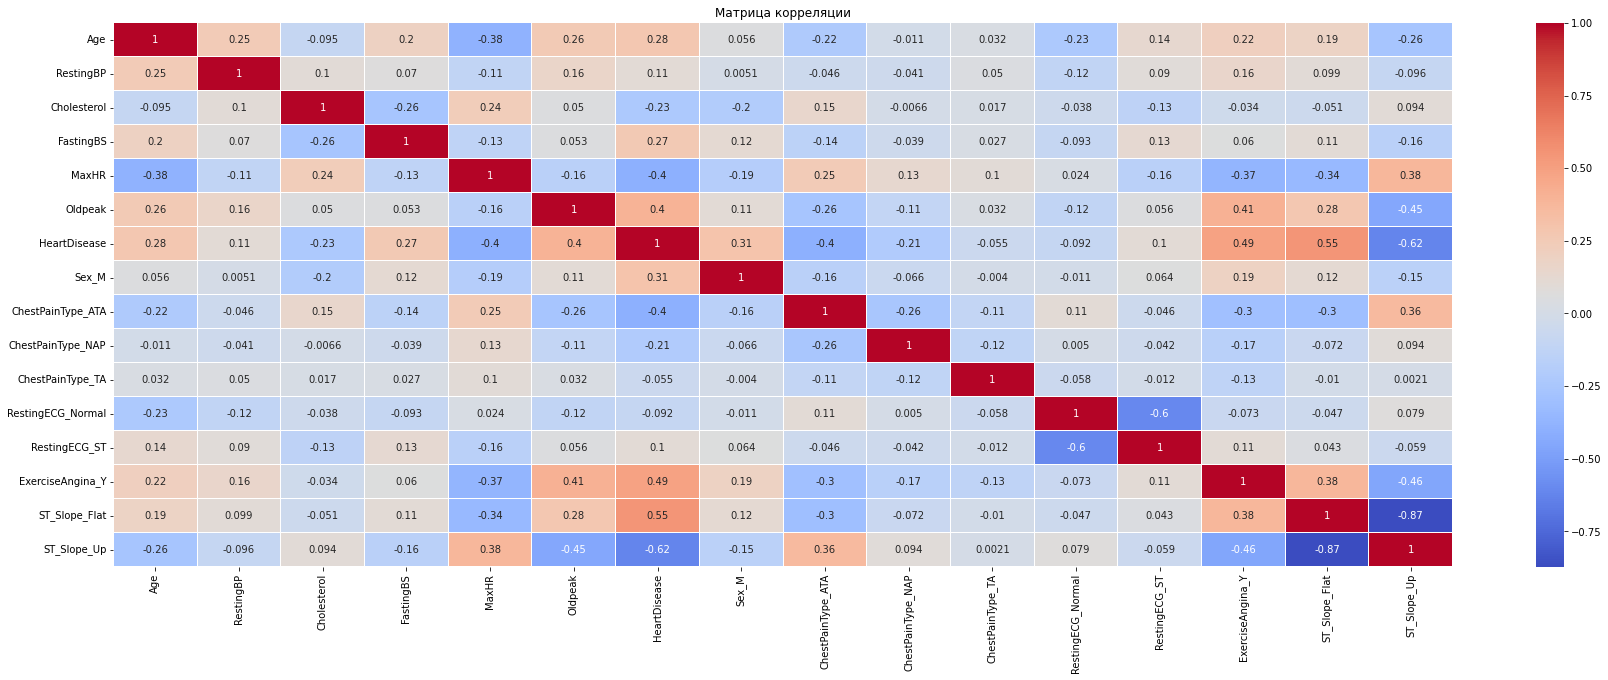

In [46]:
figure = plt.figure(figsize=(30, 10))
ax = figure.add_subplot()
ax.set_title('Матрица корреляции')

sns.heatmap(final_data.corr(), annot=True, cmap="coolwarm", linewidth=0.1)

In [47]:
X = final_data.drop(columns=['HeartDisease'], axis=1)
Y = final_data['HeartDisease']
standardizer = StandardScaler()
X_scaled=standardizer.fit_transform(X)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

[[68 14]
 [ 7 95]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



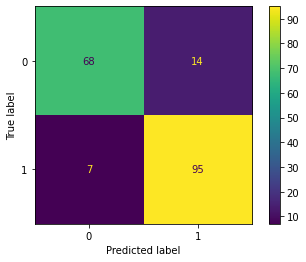

In [52]:
SVM_model = SVC(random_state=300)
SVM_model.fit(X_train, Y_train)
y_pred = SVM_model.predict(X_test)
y_train_pred = SVM_model.predict(X_train)

svm_f1 = f1_score(Y_test, y_pred)
svm_acc = accuracy_score(Y_test, y_pred)
svm_recall = recall_score(Y_test, y_pred)
svm_auc = roc_auc_score(Y_test, y_pred)

print(confusion_matrix(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(Y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(SVM_model, X_test, Y_test)